In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

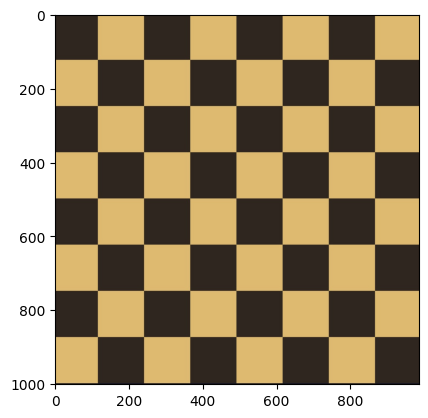

In [2]:
chess = cv2.imread(r"opencv_2\media\chess.jpg")
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)
plt.imshow(chess)

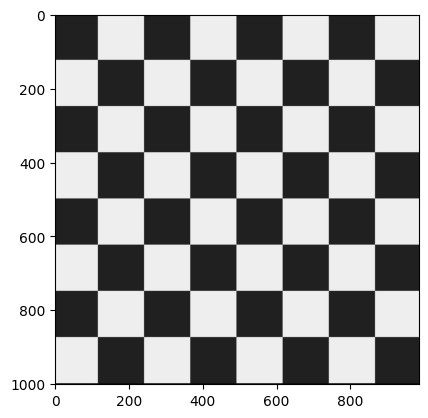

In [3]:
gray = cv2.cvtColor(chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap="gray")

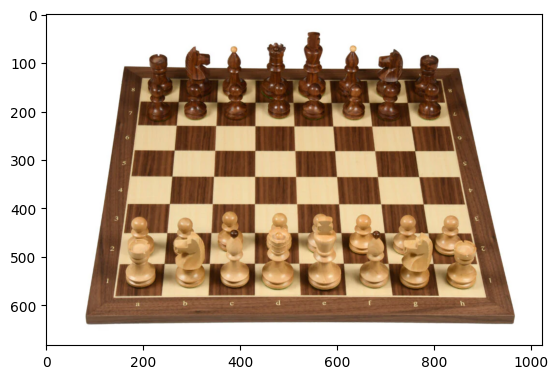

In [5]:
real_chess = cv2.imread(r"opencv_2\media\chess2.jpg")
real_chess = cv2.resize(real_chess, (400, 400))
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
plt.imshow(real_chess)

In [6]:
gray

array([[ 40,  40,  40, ..., 188, 188, 188],
       [ 40,  40,  40, ..., 188, 188, 188],
       [ 40,  40,  40, ..., 188, 188, 188],
       ...,
       [188, 188, 188, ...,  46,  47,  45],
       [ 20,  20,  20, ...,  21,  21,  20],
       [ 20,  20,  20, ...,  20,  20,  20]], dtype=uint8)

In [7]:
gray = np.float32(gray)

In [8]:
gray

array([[ 40.,  40.,  40., ..., 188., 188., 188.],
       [ 40.,  40.,  40., ..., 188., 188., 188.],
       [ 40.,  40.,  40., ..., 188., 188., 188.],
       ...,
       [188., 188., 188., ...,  46.,  47.,  45.],
       [ 20.,  20.,  20., ...,  21.,  21.,  20.],
       [ 20.,  20.,  20., ...,  20.,  20.,  20.]], dtype=float32)

In [9]:
gray.shape

(1001, 985)

In [11]:
dst = cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)
# blockSize = kenar tesbiti yaparken kullanılacak olan kare boyutu
# ksize = sobel kernel boyutu
# k = kenar tespiti hassasiyeti

In [12]:
dst = cv2.dilate(dst, None) # kenarları kalınlaştırır

In [13]:
chess[dst>0.01*dst.max()] = [255,0,0] # kenarları kırmızı yapar

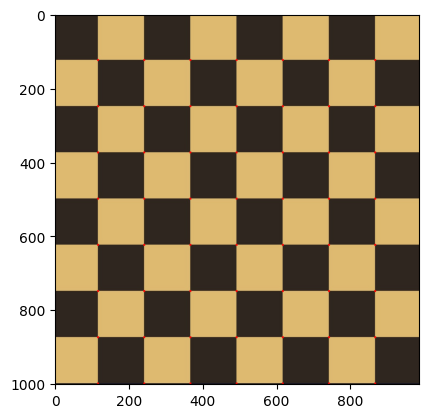

In [14]:
plt.imshow(chess)

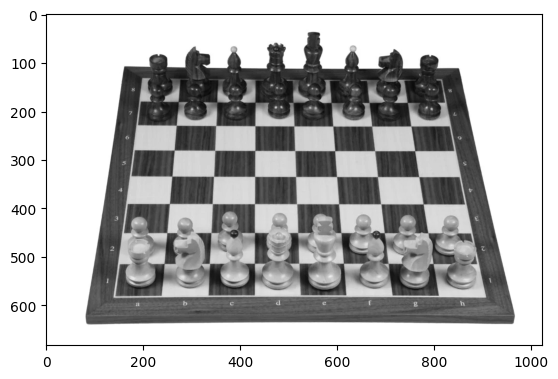

In [15]:

gray_real_chess = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)
plt.imshow(gray_real_chess, cmap="gray")

In [16]:
gray_real_chess.shape

(683, 1024)

In [18]:
gray_real_chess = np.float32(gray_real_chess)
gray_real_chess

array([[255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       ...,
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.],
       [255., 255., 255., ..., 255., 255., 255.]], dtype=float32)

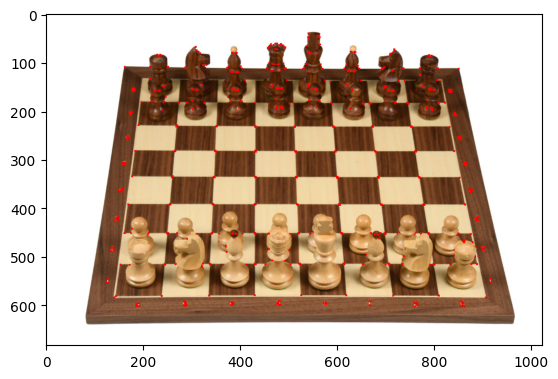

In [20]:
dst = cv2.cornerHarris(src=gray_real_chess, blockSize=2, ksize=3, k=0.04) # kenar tespiti
# blockSize = kenar tesbiti yaparken kullanılacak olan kare boyutu
# ksize = sobel kernel boyutu
# k = kenar sabiti
dst = cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()] = [255,0,0] # kenarları kırmızı yapar
plt.imshow(real_chess)

In [21]:
chess = cv2.imread(r"opencv_2\media\chess.jpg")
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(chess, cv2.COLOR_RGB2GRAY)


C:\Users\Yasin\AppData\Local\Temp\ipykernel_2444\3959000738.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


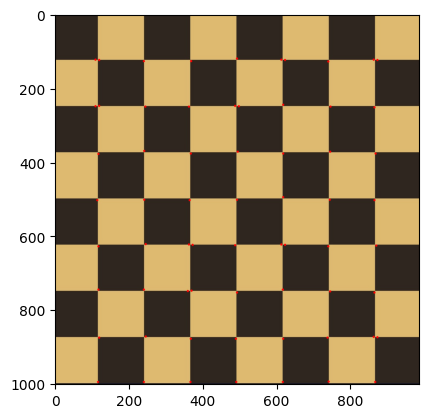

In [24]:
corners = cv2.goodFeaturesToTrack(gray, 100, 0.01, 10) # 100 tane köşe bul, 0.01 hassasiyet, 10 piksel aralık
corners = np.int0(corners) # köşeleri integer yapar

for i in corners: # köşeleri çizdirir
    x,y = i.ravel() # köşeleri düzleştirir
    # ravel = düzleştirir
    cv2.circle(chess, (x,y), 3, 255, -1)
    
    plt.imshow(chess)
    

In [25]:
real_chess = cv2.imread(r"opencv_2\media\chess2.jpg")
real_chess = cv2.resize(real_chess, (400, 400))
real_chess = cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)
real_gray = cv2.cvtColor(real_chess, cv2.COLOR_RGB2GRAY)


C:\Users\Yasin\AppData\Local\Temp\ipykernel_2444\2154017808.py:2: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  corners = np.int0(corners)


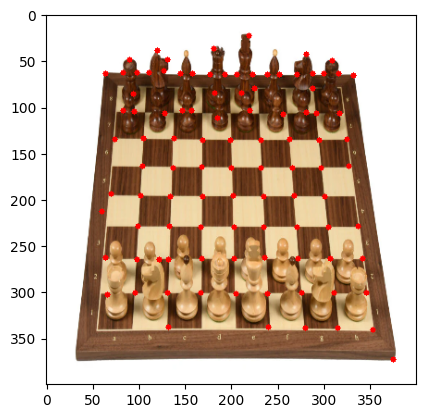

In [27]:
corners = cv2.goodFeaturesToTrack(real_gray, 64, 0.01, 10) # 64 tane köşe bul, 0.01 hassasiyet, 10 piksel aralık+
corners = np.int0(corners) # köşeleri integer yapar

for i in corners:
    x,y = i.ravel()
    cv2.circle(real_chess, (x,y), 3, 255, -1)
    
    plt.imshow(real_chess)